# Steady flow around a cylinder ($Re=40$)

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import ibmos as ib

## Numerical grid and solver initialization

In [3]:
s1 = ib.stretching(192, 0.04, 0.25, int(0.65/0.04), 16, 16, 0.04)
s2 = ib.stretching(96, 0.04, 0.25, int(0.65/0.04), 16, 16, 0.04)
x = np.concatenate([-s2[::-1], s1[1:]])

s = ib.stretching(128, 0.04, 0.25, int(0.65/0.04), 16, 16, 0.04)
y = np.concatenate([-s[::-1], s[1:]])

solver = ib.Solver(x, y, Re=40.0, Co=0.5)

## Immersed boundaries

In [4]:
solver.set_solids(ib.shapes.cylinder("cylinder", 0, 0, 0.5, solver.dxmin))

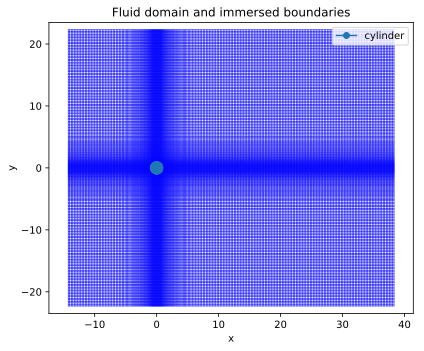

In [5]:
solver.plot_domain(figsize=(6, 5));

## Boundary conditions

In [7]:
uBC, vBC = solver.zero_boundary_conditions()
for k in range(4):
    uBC[k][:] = 1

sBC = ((np.zeros(solver.solids[0].l), np.zeros(solver.solids[0].l)), )

## Steady simulation

In [10]:
x0, = solver.steps(solver.zero(), uBC, vBC, sBC, number=1, reportEvery=1)

  step      t        residual   cylinder(fx) cylinder(fy) 
     1    0.020000 1.000000e+00 181.747289118 -0.000000000 


In [11]:
x = solver.steady_state(x0, uBC, vBC, sBC, outflowEast=False)[0]

  step  residual(x)  residual(f) cylinder(fx) cylinder(fy) 
     1 7.162108e+02 1.176235e+02  1.726738355 -0.000000000 
     2 6.663669e-02 1.482904e-02  1.544066080  0.000000000 
     3 2.286669e-02 1.834180e-03  1.578721792  0.000000000 
     4 1.144649e-03 1.586467e-04  1.580740487  0.000000000 
     5 4.983738e-06 9.730398e-07  1.580745288  0.000000000 
     6 8.819512e-11 2.083336e-11  1.580745288  0.000000000 


## Display results

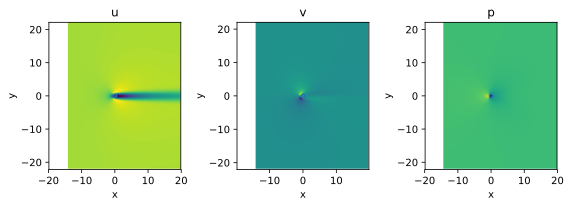

In [16]:
solver.plot_field(x, xlim=(-1, 2), ylim=(-0.5, 0.5))